In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle

In [31]:
import warnings
warnings.filterwarnings('ignore')

---
## 데이터 불러오기

In [32]:
spam_df = pd.read_csv("data/spambase.csv")

---
## 데이터 구조 및 기초 통계 확인

In [33]:
spam_df.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,freq_;,freq_(,freq_[,freq_!,freq_$,freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


---
## 결측치 탐색 및 제거

In [34]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   make                        4579 non-null   float64
 1   address                     4564 non-null   float64
 2   all                         4569 non-null   float64
 3   3d                          4564 non-null   float64
 4   our                         4578 non-null   float64
 5   over                        4561 non-null   float64
 6   remove                      4560 non-null   float64
 7   internet                    4567 non-null   float64
 8   order                       4575 non-null   float64
 9   mail                        4562 non-null   float64
 10  receive                     4567 non-null   float64
 11  will                        4583 non-null   float64
 12  people                      4554 non-null   float64
 13  report                      4563 

In [35]:
spam_df = spam_df.fillna(0)

In [36]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   make                        4601 non-null   float64
 1   address                     4601 non-null   float64
 2   all                         4601 non-null   float64
 3   3d                          4601 non-null   float64
 4   our                         4601 non-null   float64
 5   over                        4601 non-null   float64
 6   remove                      4601 non-null   float64
 7   internet                    4601 non-null   float64
 8   order                       4601 non-null   float64
 9   mail                        4601 non-null   float64
 10  receive                     4601 non-null   float64
 11  will                        4601 non-null   float64
 12  people                      4601 non-null   float64
 13  report                      4601 

In [37]:
word_freq_df = spam_df.iloc[:, :48]

# K-Means 클러스터링 적용 (군집 개수: 5개)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(word_freq_df.T)

# 클러스터링 결과 저장
word_clusters = {i: [] for i in range(num_clusters)}
for idx, cluster in enumerate(cluster_labels):
    word_clusters[cluster].append(f"word_freq_{idx}")

# 단독 군집을 방지하기 위해 모든 단어를 하나의 리스트로 병합
all_words = sum(word_clusters.values(), [])

# 5개의 균형 잡힌 군집 생성
final_word_clusters = {i: [] for i in range(num_clusters)}
cluster_cycle = cycle(range(num_clusters))  # 순환하면서 배분
for word in all_words:
    final_word_clusters[next(cluster_cycle)].append(word)

# 최종 군집 출력
final_word_clusters


{0: ['word_freq_0',
  'word_freq_6',
  'word_freq_11',
  'word_freq_16',
  'word_freq_22',
  'word_freq_29',
  'word_freq_34',
  'word_freq_39',
  'word_freq_44',
  'word_freq_18'],
 1: ['word_freq_1',
  'word_freq_7',
  'word_freq_12',
  'word_freq_17',
  'word_freq_23',
  'word_freq_30',
  'word_freq_35',
  'word_freq_40',
  'word_freq_45',
  'word_freq_3'],
 2: ['word_freq_2',
  'word_freq_8',
  'word_freq_13',
  'word_freq_19',
  'word_freq_25',
  'word_freq_31',
  'word_freq_36',
  'word_freq_41',
  'word_freq_46',
  'word_freq_24'],
 3: ['word_freq_4',
  'word_freq_9',
  'word_freq_14',
  'word_freq_20',
  'word_freq_27',
  'word_freq_32',
  'word_freq_37',
  'word_freq_42',
  'word_freq_47'],
 4: ['word_freq_5',
  'word_freq_10',
  'word_freq_15',
  'word_freq_21',
  'word_freq_28',
  'word_freq_33',
  'word_freq_38',
  'word_freq_43',
  'word_freq_26']}

In [38]:
# PCA 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(n_components=2)       # 2차원으로 축소

X = word_freq_df.T       # 독립변수(특성 데이터)만 모아서 x

pca.fit(X)

X_pca = pca.transform(X)

X_pca_df = pd.DataFrame(X_pca, columns=['pca_col1', 'pca_col2'])
# X_pca_df['target'] = df.iloc[:,-1]

X_pca_df

,pca_col1,pca_col2
0,-5.628828,-2.526587
1,-6.101706,-4.057302
2,-6.098320,7.683641
3,-6.603525,-10.565037
4,-6.205401,9.379437
5,-5.561794,-3.891544
6,-5.920892,-1.903475
7,-5.797760,-3.900762
8,-5.594322,-4.694438
9,-5.957229,4.880996


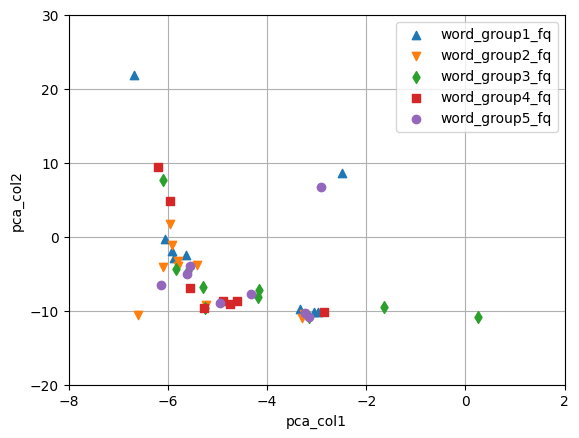

In [39]:
# 축소한 차원으로 시각화
markers = ['^', 'v', 'd', 's', 'o']
group1  = [0, 6, 11, 16, 18, 22, 29, 34, 39, 44]
group2  = [1, 3, 7, 12, 17, 23, 30, 35, 40, 45]
group3  = [2, 8, 13, 19, 24, 25, 31, 36, 41, 46]
group4  = [4, 9, 14, 20, 27, 32, 37, 42, 47]
group5  = [5, 10, 15, 21, 26, 28, 33, 38, 43]
total   = [group1, group2, group3, group4, group5]
group_names = ['group1', 'group2', 'group3', 'group4', 'group5']

for i, marker in enumerate(markers):
    x = X_pca_df.loc[total[i], 'pca_col1']
    y = X_pca_df.loc[total[i], 'pca_col2']
    plt.scatter(x, y, marker=marker, label=group_names[i], zorder=i+2)

plt.legend()
plt.xlabel('pca_col1')
plt.ylabel('pca_col2')
plt.xlim([-8, 2])
plt.ylim([-20, 30])
plt.legend(['word_group1_fq', 'word_group2_fq', 'word_group3_fq', 'word_group4_fq', 'word_group5_fq'])
plt.grid(zorder=1)
plt.show()

---
## 데이터 정제 및 전처리

In [40]:
new_spam = pd.DataFrame(spam_df.iloc[:, [0, 6, 11, 16, 18, 22, 29, 34, 39, 44]].sum(axis=1)/len([0, 6, 11, 16, 18, 22, 29, 34, 39, 44]), columns=["group_1"])
new_spam["group_2"] = pd.DataFrame(spam_df.iloc[:, [1, 3, 7, 12, 17, 23, 30, 35, 40, 45]].sum(axis=1)/len([1, 3, 7, 12, 17, 23, 30, 35, 40, 45]))
new_spam["group_3"] = pd.DataFrame(spam_df.iloc[:, [2, 8, 13, 19, 24, 25, 31, 36, 41, 46]].sum(axis=1)/len([2, 8, 13, 19, 24, 25, 31, 36, 41, 46]))
new_spam["group_4"] = pd.DataFrame(spam_df.iloc[:, [4, 9, 14, 20, 27, 32, 37, 42, 47]].sum(axis=1)/len([4, 9, 14, 20, 27, 32, 37, 42, 47]))
new_spam["group_5"] = pd.DataFrame(spam_df.iloc[:, [26, 5, 10, 15, 21, 28, 33, 38, 43]].sum(axis=1)/len([26, 5, 10, 15, 21, 28, 33, 38, 43]))
new_spam["symbols"] = pd.DataFrame(spam_df.iloc[:, 48:54].sum(axis=1)/6)
new_spam["capital_run_length_average"] = spam_df["capital_run_length_average"]
new_spam["capital_run_length_longest"] = spam_df["capital_run_length_longest"]
new_spam["capital_run_length_total"] = spam_df["capital_run_length_total"]
new_spam["is_spam"] = spam_df["is_spam"]


In [41]:
new_spam.columns=['word_group1_fq', 'word_group2_fq', 'word_group3_fq', 'word_group4_fq', 
                  'word_group5_fq', 'symbols_fq', 'capital_length_average','capital_length_longest',
                  'capital_length_total','is_spam']
new_spam

,word_group1_fq,word_group2_fq,word_group3_fq,word_group4_fq,word_group5_fq,symbols_fq,capital_length_average,capital_length_longest,capital_length_total,is_spam
0,0.257,0.193,0.064,0.142222,0.035556,0.129667,3.756,61,278,1
1,0.518,0.171,0.078,0.312222,0.070000,0.122000,5.114,101,1028,1
2,0.340,0.139,0.167,0.428889,0.070000,0.103833,9.821,485,2259,1
3,0.380,0.094,0.031,0.174444,0.068889,0.045667,3.537,40,191,1
4,0.380,0.094,0.031,0.174444,0.068889,0.045000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...
4596,0.312,0.031,0.062,0.000000,0.068889,0.038667,1.142,3,88,0
4597,0.600,0.200,0.000,0.222222,0.000000,0.058833,1.555,4,14,0
4598,0.360,0.240,0.030,0.033333,0.000000,0.136667,1.404,6,118,0
4599,0.321,0.032,0.000,0.071111,0.035556,0.009500,1.147,5,78,0


---
## 데이터 변환을 위한 이상치 탐지


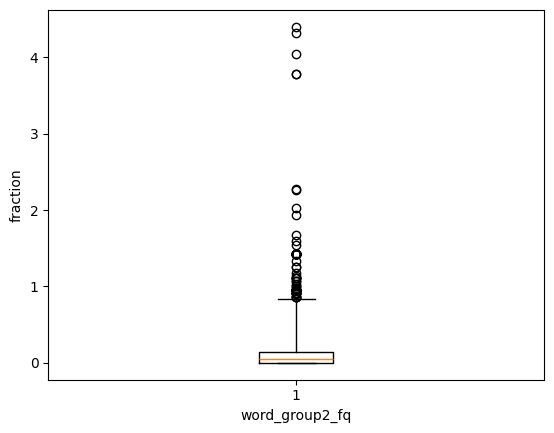

In [42]:

plt.boxplot(new_spam["word_group2_fq"],whis=5)
plt.xlabel('word_group2_fq')
plt.ylabel('fraction')
plt.show()


In [43]:
Q1 = np.percentile(new_spam["word_group2_fq"], 25)  # 1사분위수
Q3 = np.percentile(new_spam["word_group2_fq"], 75)  # 3사분위수
IQR = Q3 - Q1

lower_bound = Q1 - 5 * IQR
upper_bound = Q3 + 5 * IQR

outliers_2 = new_spam["word_group2_fq"][(new_spam["word_group2_fq"] < lower_bound) | (new_spam["word_group2_fq"] > upper_bound)]
print(f"이상치 개수: {len(outliers_2)}")

이상치 개수: 87


In [44]:
display(new_spam["word_group2_fq"].sort_values()[:-len(outliers_2)].describe())

count    4514.000000
mean        0.088648
std         0.124096
min         0.000000
25%         0.000000
50%         0.044000
75%         0.132000
max         0.832000
Name: word_group2_fq, dtype: float64

In [45]:
new_spam["word_group2_fq"] = np.where(new_spam["word_group2_fq"] >= new_spam["word_group2_fq"].sort_values()[:-len(outliers_2)].mean(), 1, 0)

new_spam

,word_group1_fq,word_group2_fq,word_group3_fq,word_group4_fq,word_group5_fq,symbols_fq,capital_length_average,capital_length_longest,capital_length_total,is_spam
0,0.257,1,0.064,0.142222,0.035556,0.129667,3.756,61,278,1
1,0.518,1,0.078,0.312222,0.070000,0.122000,5.114,101,1028,1
2,0.340,1,0.167,0.428889,0.070000,0.103833,9.821,485,2259,1
3,0.380,1,0.031,0.174444,0.068889,0.045667,3.537,40,191,1
4,0.380,1,0.031,0.174444,0.068889,0.045000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...
4596,0.312,0,0.062,0.000000,0.068889,0.038667,1.142,3,88,0
4597,0.600,1,0.000,0.222222,0.000000,0.058833,1.555,4,14,0
4598,0.360,1,0.030,0.033333,0.000000,0.136667,1.404,6,118,0
4599,0.321,0,0.000,0.071111,0.035556,0.009500,1.147,5,78,0


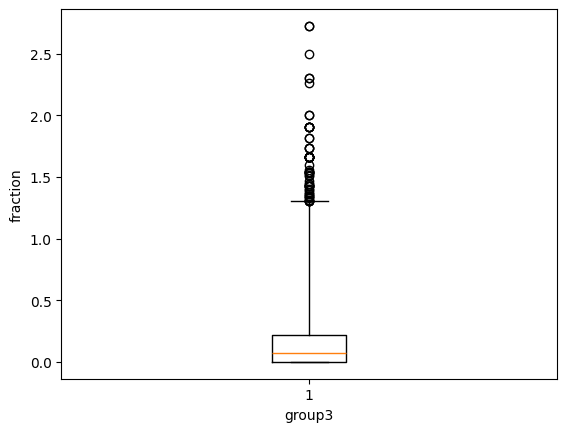

In [46]:
plt.boxplot(new_spam["word_group3_fq"], whis=5)
plt.xlabel('group3')
plt.ylabel('fraction')
plt.show()


In [47]:
Q1 = np.percentile(new_spam["word_group3_fq"], 25)
Q3 = np.percentile(new_spam["word_group3_fq"], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 5 * IQR
upper_bound = Q3 + 5 * IQR

outliers_3 = new_spam["word_group3_fq"][(new_spam["word_group3_fq"] < lower_bound) | (new_spam["word_group3_fq"] > upper_bound)]
print(f"이상치 개수: {len(outliers_3)}")

이상치 개수: 62


In [48]:
display(new_spam["word_group3_fq"].sort_values()[:-len(outliers_3)].describe())

count    4539.000000
mean        0.144695
std         0.202004
min         0.000000
25%         0.000000
50%         0.072000
75%         0.210000
max         1.302000
Name: word_group3_fq, dtype: float64

In [49]:
new_spam["word_group3_fq"] = np.where(new_spam["word_group3_fq"] >= new_spam["word_group3_fq"].sort_values()[:-len(outliers_3)].mean(), 1, 0)
new_spam

,word_group1_fq,word_group2_fq,word_group3_fq,word_group4_fq,word_group5_fq,symbols_fq,capital_length_average,capital_length_longest,capital_length_total,is_spam
0,0.257,1,0,0.142222,0.035556,0.129667,3.756,61,278,1
1,0.518,1,0,0.312222,0.070000,0.122000,5.114,101,1028,1
2,0.340,1,1,0.428889,0.070000,0.103833,9.821,485,2259,1
3,0.380,1,0,0.174444,0.068889,0.045667,3.537,40,191,1
4,0.380,1,0,0.174444,0.068889,0.045000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...
4596,0.312,0,0,0.000000,0.068889,0.038667,1.142,3,88,0
4597,0.600,1,0,0.222222,0.000000,0.058833,1.555,4,14,0
4598,0.360,1,0,0.033333,0.000000,0.136667,1.404,6,118,0
4599,0.321,0,0,0.071111,0.035556,0.009500,1.147,5,78,0


count    4601.000000
mean        0.177517
std         0.416560
min         0.000000
25%         0.000000
50%         0.050000
75%         0.153333
max         4.444444
Name: word_group5_fq, dtype: float64

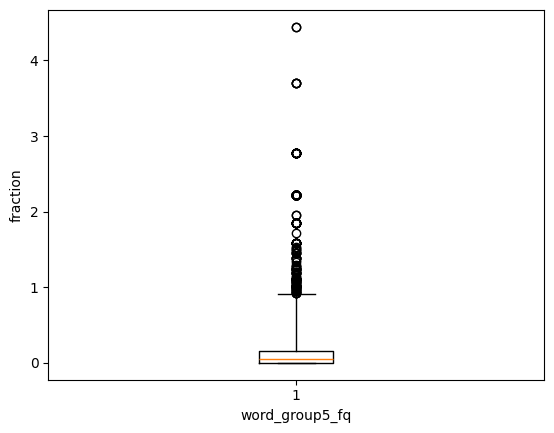

In [50]:
display(new_spam["word_group5_fq"].sort_values().describe())
plt.boxplot(new_spam["word_group5_fq"], whis=5)
plt.xlabel('word_group5_fq')
plt.ylabel('fraction')
plt.show()


In [51]:
Q1 = np.percentile(new_spam["word_group5_fq"], 25)
Q3 = np.percentile(new_spam["word_group5_fq"], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 5 * IQR
upper_bound = Q3 + 5 * IQR

outliers_5 = new_spam["word_group5_fq"][(new_spam["word_group5_fq"] < lower_bound) | (new_spam["word_group5_fq"] > upper_bound)]
print(f"이상치 개수: {len(outliers_5)}")

이상치 개수: 210


In [52]:
display(new_spam["word_group5_fq"].sort_values()[:-len(outliers_5)].describe())

count    4391.000000
mean        0.097978
std         0.147830
min         0.000000
25%         0.000000
50%         0.043333
75%         0.136667
max         0.913333
Name: word_group5_fq, dtype: float64

In [53]:
new_spam["word_group5_fq"] = np.where(new_spam["word_group5_fq"] >= new_spam["word_group5_fq"].sort_values()[:-len(outliers_5)].mean(), 1, 0)
new_spam.head()

,word_group1_fq,word_group2_fq,word_group3_fq,word_group4_fq,word_group5_fq,symbols_fq,capital_length_average,capital_length_longest,capital_length_total,is_spam
0,0.257,1,0,0.142222,0,0.129667,3.756,61,278,1
1,0.518,1,0,0.312222,0,0.122000,5.114,101,1028,1
2,0.340,1,1,0.428889,0,0.103833,9.821,485,2259,1
3,0.380,1,0,0.174444,0,0.045667,3.537,40,191,1
4,0.380,1,0,0.174444,0,0.045000,3.537,40,191,1


---
## 데이터 시각화 (히트맵)

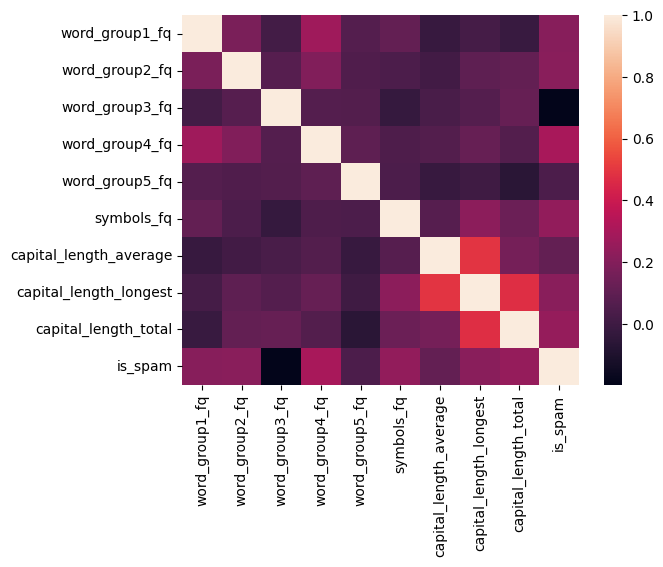

In [54]:
corr_matrix = new_spam.corr(numeric_only=True)

sns.heatmap(corr_matrix)
plt.show()

---
## 데이터 스케일링

In [55]:
standard_sc = StandardScaler()

new_spam_scaled = new_spam.drop(["is_spam"], axis=1)
new_spam_scaled = standard_sc.fit_transform(new_spam_scaled)

In [56]:
new_spam_scaled = pd.DataFrame(new_spam_scaled) 
new_spam_scaled.columns=['word_group1_fq', 'word_group2_fq', 'word_group3_fq', 'word_group4_fq', 
                  'word_group5_fq', 'symbols_fq', 'capital_length_average','capital_length_longest',
                  'capital_length_total']
new_spam_scaled["is_spam"] = new_spam["is_spam"]
new_spam_scaled.head()

,word_group1_fq,word_group2_fq,word_group3_fq,word_group4_fq,word_group5_fq,symbols_fq,capital_length_average,capital_length_longest,capital_length_total,is_spam
0,-0.249788,1.271683,-0.722494,-0.243515,-0.750226,0.181360,-0.045247,0.045298,-0.008724,1
1,0.721650,1.271683,-0.722494,0.595919,-0.750226,0.138423,-0.002443,0.250563,1.228324,1
2,0.059137,1.271683,1.384094,1.172002,-0.750226,0.036682,0.145921,2.221106,3.258733,1
3,0.208016,1.271683,-0.722494,-0.084407,-0.750226,-0.289076,-0.052150,-0.062466,-0.152222,1
4,0.208016,1.271683,-0.722494,-0.084407,-0.750226,-0.292809,-0.052150,-0.062466,-0.152222,1
